<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Sesiones/Sesion_01b_pandas_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Problema: Dataset de pingüinos:

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```


1. ¿Cuántas especies diferentes de pingüinos hay en el dataset?


2. ¿Cuál es la longitud media del pico de los pingüinos de la especie Adelie?

3. ¿Cuál es la masa corporal promedio de los pingüinos de la especie Gentoo?

4. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?

5. ¿Cuál es la isla con mayor número de pingüinos en el dataset?

6. ¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?

7. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

8. ¿Cuál es la proporción de machos y hembras en la especie Adelie?

9. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

10. ¿Cuál es la distribución de la masa corporal entre las especies de pingüinos?

11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cuántos pingüinos tienen una masa corporal superior a 5000 gramos?

13. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

14. ¿Cuál es la relación entre la longitud de la aleta y la masa corporal en los pingüinos de la especie Gentoo?

15. ¿Cuántos pingüinos tienen datos faltantes en alguna de sus características?

16. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

17. ¿Cuál es la diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap?

18. ¿Qué especie de pingüino tiene la longitud de aleta promedio más alta?

19. ¿Cuál es la longitud del pico más pequeña registrada en el dataset y de qué especie es?

20. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie?

In [238]:
import pandas as pd
import seaborn as sns
from tabulate import tabulate


# Cargar el dataset
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


1. Hay 3 especies diferentes
2. La longitud promedio del pico de los Pingüinos Adelie es de 38.79 mm
3. La masa corporal promedio de los Pingüinos Gentoo es de 5076.02 g
4. La relación promedio entre la Longitud del pico (mm) y la masa corporal (g) es de 0.01
5. La isla con mayor número de pingüinos es Biscoe
6. La desviación estandar de la longitud de la aleta de la especia Chinstrap es de 7.131894258578147 mm
7. El pico más largo de Pingüino mide 59.6 mm y es de la especie Gentoo
8. La proporción entre machos y hembras de la especie Adelie es 1.0
9. 
 • Para el análisis de correlación primero intuimos de forma general el posible tipo de correlación. Es notable en cierta cantidad de datos que hay una propocionalidad positiva: a mayor masa del pungüino, mayor tamaño del pico, pero este no es siempre el caso. 

+-----+---------------+------------------+
|     |   body_mass_g |   bill_length_mm |
|-----+---------------+------------------|
| 190 |          2700 |             46.9 |
|  64 

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

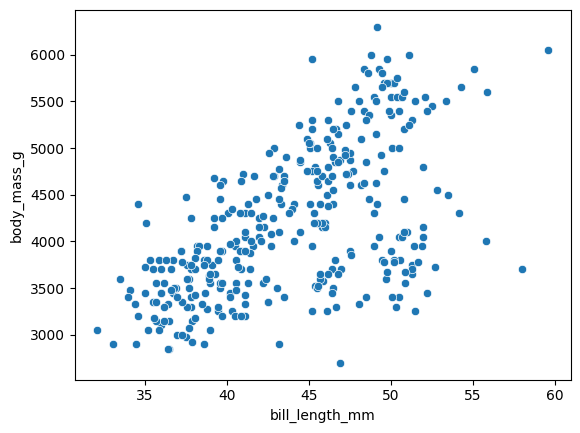

In [239]:
dfnn = df.dropna()

especies = len(df.species.unique())
print(f"1. Hay {especies} especies diferentes")

meanBillAdelie = round(df.where(df["species"] == "Adelie")["bill_length_mm"].mean(),2)
print(f"2. La longitud promedio del pico de los Pingüinos Adelie es de {meanBillAdelie} mm")

meanBodyMassGentoo = round(df.where(df["species"] == "Gentoo")["body_mass_g"].mean(skipna = True),2)
print(f"3. La masa corporal promedio de los Pingüinos Gentoo es de {meanBodyMassGentoo} g")

df["bill_body_relation"] = (df["bill_length_mm"] / df["body_mass_g"])
billLengthBodyMassRelation = round(df["bill_body_relation"].mean(skipna = True),2)
print(f"4. La relación promedio entre la Longitud del pico (mm) y la masa corporal (g) es de {billLengthBodyMassRelation}")

groupByIsland = df.groupby("island")["island"].count().reset_index(name="count")
maxIsland = groupByIsland.where(groupByIsland["count"] == groupByIsland["count"].max())["island"][0]
print(f"5. La isla con mayor número de pingüinos es "+maxIsland)

stdFlipperChinstrap = df.where(df["species"] == "Chinstrap")["flipper_length_mm"].std()
print(f"6. La desviación estandar de la longitud de la aleta de la especia Chinstrap es de {stdFlipperChinstrap} mm")

largestBillSpecies = df['bill_length_mm'].idxmax()
maxBill = df.loc[largestBillSpecies]["bill_length_mm"]
maxBillSpecies = df.loc[largestBillSpecies]["species"]
print(f"7. El pico más largo de Pingüino mide {maxBill} mm y es de la especie {maxBillSpecies}")

adelieSex = df.where(df["species"] == "Adelie").groupby("sex")["sex"].count().reset_index(name="count")
maleFemaleAdelieRel = adelieSex.iloc[1]["count"] / adelieSex.iloc[0]["count"]
print(f"8. La proporción entre machos y hembras de la especie Adelie es {maleFemaleAdelieRel}")

print("9. \n • Para el análisis de correlación primero intuimos de forma general el posible tipo de correlación. Es notable en cierta cantidad de datos que hay una propocionalidad positiva: a mayor masa del pungüino, mayor tamaño del pico, pero este no es siempre el caso. \n")
dfnnCorr = df[["body_mass_g","bill_length_mm"]].copy().dropna();
print(tabulate(dfnnCorr.sort_values(by='body_mass_g').iloc[:25], headers='keys', tablefmt='psql'))
print("\n También podemos hacer un scatter plot de los datos para tener una noción de su agrupamiento, ver si hay clusters o si forman algún patron: \n")
sns.scatterplot(data=df, x="bill_length_mm", y="body_mass_g")

10. Podemos apreciar que hay menos desviación de los datos en la masa corporal de la especie Adelie, mientras que en la especie Gentoo, las masas corporales son más variadas y dispersas.
 También es esta última la especie con mayores masas.


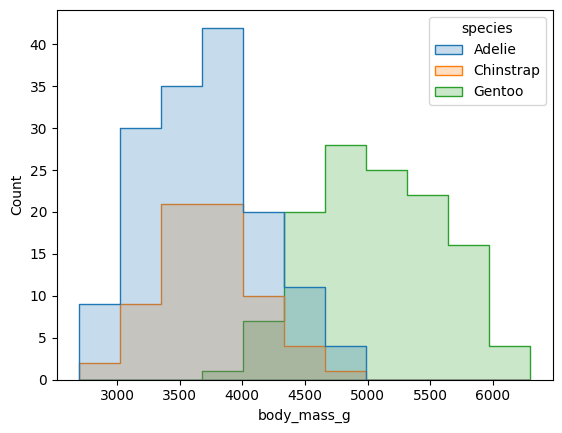

In [240]:
# -------------------- 10 --------------------------
speciesDf = df.groupby(by="species")
#[sns.histplot(data=specie, x="body_mass_g", hue="species", multiple="stack") for i, specie in speciesDf]
sns.histplot(data=df, x="body_mass_g", hue="species", element="step")
print("10. Podemos apreciar que hay menos desviación de los datos en la masa corporal de la especie Adelie, mientras que en la especie Gentoo, las masas corporales son más variadas y dispersas.\n También es esta última la especie con mayores masas.")
# --------------------------------------------------

9. La correlación por pares por el método de Pearson entre los datos del largo del pico y la masa de lops pingüinos es de aproximadamente 0.5951098244376303. Aunque exista una propocionalidad, no se puede afirmar que hay una correlación directa entre los datos.

11. La longitud máxima de aletas segmentado por especie es: 
     species  Longitud_Máxima_Aleta_mm
0     Adelie                     210.0
1  Chinstrap                     212.0
2     Gentoo                     231.0 

 La longitud mínima de aletas segmentado por especie es: 
     species  Longitud_Mínima_Aleta_mm
0     Adelie                     172.0
1  Chinstrap                     178.0
2     Gentoo                     203.0 


12. Hay 61 pingüinos con una masa corporal superior a 5000 g 

13.
La especie Adelie en la isla Biscoe tiene una desviación estandar de 2.480915528683941
La especie Adelie en la isla Dream tiene una desviación estandar de 2.4653593558032774
La especie Adelie en la isla Torgersen tiene una desviación 

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

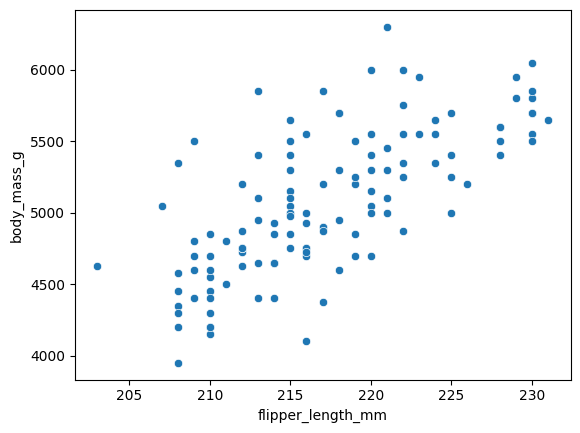

In [241]:
corrPicoMasa = dfnnCorr["bill_length_mm"].corr(dfnnCorr["body_mass_g"]) #df["bill_length_mm"],df["body_mass_g"]
print(f"9. La correlación por pares por el método de Pearson entre los datos del largo del pico y la masa de lops pingüinos es de aproximadamente {corrPicoMasa}. Aunque exista una propocionalidad, no se puede afirmar que hay una correlación directa entre los datos.\n")

flipperLengthMaxbySpec = df.groupby(by="species")["flipper_length_mm"].max().reset_index(name="Longitud_Máxima_Aleta_mm")
flipperLengthMinbySpec = df.groupby(by="species")["flipper_length_mm"].min().reset_index(name="Longitud_Mínima_Aleta_mm")
print(f"11. La longitud máxima de aletas segmentado por especie es: \n{flipperLengthMaxbySpec} \n\n La longitud mínima de aletas segmentado por especie es: \n{flipperLengthMinbySpec} \n\n")

countMassGreaterThan = df[df["body_mass_g"] > 5000]["body_mass_g"].count()
print(f"12. Hay {countMassGreaterThan} pingüinos con una masa corporal superior a 5000 g \n")

print(f"13.")
[[print("La especie "+i+" en la isla "+j+" tiene una desviación estandar de "+str(island["bill_length_mm"].std())) for j, island in dfGroup.groupby(by="island")] for i, dfGroup in speciesDf]

gentoo = speciesDf.get_group("Gentoo")
print(f"\n14. Para hallar una posible relación entre los datos primero haremos un scatter plot \n")
sns.scatterplot(data=gentoo, x="flipper_length_mm", y="body_mass_g")

In [242]:
print(f"Vemos que existe una posible correlación positiva (proporcionalidad entre longitud de la aleta y el peso del pingüino de la especie Gentoo). Ahora calculamos su correlación de Pearson:")
corrAletaMasaGentoo = gentoo["flipper_length_mm"].corr(gentoo["body_mass_g"])
print(f"La correlación es de {corrAletaMasaGentoo} \n")


nullRows = df.isnull().any(axis="columns").sum()
print(f"15. Existen {nullRows} pingüinos con al menos un dato nulo \n")
#print([df.iloc[i] for i in [3,8,9,10,11,47,246,286,324,336,339]])

print(f"16. La isla con una mayor desviación estandar en los valores de la longitud del pico de todos los pingüinos en ella es la Isla Dream.")
islandDf = df.groupby(by="island")
[print("La isla "+i+" tiene una desviación estandar de "+str(round(island["bill_length_mm"].std(),2))) for i,island in islandDf]

chinstrap = speciesDf.get_group("Chinstrap")
maleChinstrapMass = chinstrap.where(df["sex"] == "Male")["body_mass_g"].mean()
femaleChinstrapMass = chinstrap.where(df["sex"] == "Female")["body_mass_g"].mean()
print("\n17. La diferencia absoluta entre las masas promedios de machos y hembras de la especie Chinstrap es de "+str(round(abs(maleChinstrapMass-femaleChinstrapMass),2))+" g \n")

print("18. La especie con la aleta más larga en promedio es "+speciesDf["flipper_length_mm"].mean().idxmax()+"\n")

smallestBill = df.iloc[df["bill_length_mm"].idxmin()]

print("19. El pingüino con el pico más pequeño pertenece a la especie "+smallestBill["species"]+ " y tiene una longitud de "+str(smallestBill["bill_length_mm"])+" mm \n")

adelie = speciesDf.get_group("Adelie")
maleAdelieFlipper = adelie.where(df["sex"] == "Male")["flipper_length_mm"].mean()
femaleAdelieFlipper = adelie.where(df["sex"] == "Female")["flipper_length_mm"].mean()

print("20. Los valores promedios de longitud de aletas en la especie Adelie varian ligeramente en un valor de "+str(round(abs(maleAdelieFlipper-femaleAdelieFlipper),2))+" mm. Los machos tiene una aleta levementa más larga que las hembras.")




Vemos que existe una posible correlación positiva (proporcionalidad entre longitud de la aleta y el peso del pingüino de la especie Gentoo). Ahora calculamos su correlación de Pearson:
La correlación es de 0.7026665243575183 

15. Existen 11 pingüinos con al menos un dato nulo 

16. La isla con una mayor desviación estandar en los valores de la longitud del pico de todos los pingüinos en ella es la Isla Dream.
La isla Biscoe tiene una desviación estandar de 4.77
La isla Dream tiene una desviación estandar de 5.95
La isla Torgersen tiene una desviación estandar de 3.03

17. La diferencia absoluta entre las masas promedios de machos y hembras de la especie Chinstrap es de 411.76 g 

18. La especie con la aleta más larga en promedio es Gentoo

19. El pingüino con el pico más pequeño pertenece a la especie Adelie y tiene una longitud de 32.1 mm 

20. Los valores promedios de longitud de aletas en la especie Adelie varian ligeramente en un valor de 4.62 mm. Los machos tiene una aleta leveme

# Reto, puede emplear IA.

## Dataset de terremotos (USGS)

El siguiente codigo en python permite descargar datos de terremotos a nivel mundial registrados por [USGS Earthquake Data - CSV Format](https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php) en el año 2023, lo puedes modificar para descargar otras fechas:



```python
import requests
from io import BytesIO
import pandas as pd

base_url = 'https://earthquake.usgs.gov/fdsnws/event/1/query'

# Parámetros de la búsqueda
params = {
    'format': 'csv',         # Formato de salida en CSV
    'starttime': '2023-01-01', # Fecha de inicio (cambiar según necesidad)
    'endtime': '2023-12-31',   # Fecha de fin (cambiar según necesidad)
    'minmagnitude': 5,         # Magnitud mínima
    'maxmagnitude': 10,        # Magnitud máxima
    'minlatitude': -90,        # Latitud mínima
    'maxlatitude': 90,         # Latitud máxima
    'minlongitude': -180,      # Longitud mínima
    'maxlongitude': 180,       # Longitud máxima
    'limit': 20000             # Límite de eventos a devolver (máximo 20000)
}

response = requests.get(base_url, params=params)
response = requests.get(base_url, params=params)
df = pd.read_csv(BytesIO(response.content))
```


- **time**: Momento exacto en el que ocurrió el evento, en formato de fecha y hora.
- **latitude**: Latitud en grados decimales. Los valores negativos indican latitudes del hemisferio sur.
- **longitude**: Longitud en grados decimales. Los valores negativos corresponden a longitudes del hemisferio occidental.
- **depth**: Profundidad del evento en kilómetros.
- **mag**: Magnitud del terremoto.
- **magType**: Algoritmo o método utilizado para calcular la magnitud del evento.
- **nst**: Número total de estaciones sísmicas utilizadas para determinar la ubicación del terremoto.
- **gap**: Mayor brecha azimutal entre estaciones sísmicas adyacentes (en grados).
- **dmin**: Distancia horizontal desde el epicentro hasta la estación más cercana (en grados).
- **rms**: Raíz cuadrada media (RMS) del tiempo de viaje residual de las ondas sísmicas.
- **net**: Identificador de la red de datos que fue la fuente principal de información para este evento.
- **id**: Identificador único del evento.
- **updated**: Momento en que se actualizó la información del evento por última vez.
- **place**: Descripción textual de la región geográfica cercana al evento.
- **type**: Tipo de evento (por ejemplo, terremoto).
- **horizontalError**: Error estimado en la ubicación horizontal del epicentro.
- **depthError**: Error estimado en la profundidad del evento.
- **magError**: Error estimado en la magnitud del evento.
- **magNst**: Número de estaciones que reportaron la magnitud.
- **status**: Estado de revisión del evento (por ejemplo, revisado o automático).
- **locationSource**: Fuente de información sobre la ubicación del evento.
- **magSource**: Fuente de la magnitud informada del evento.



Construya un heatmap de los eventos que ocurrieron a lo largo del 2023, te puedes ayudar del siguiente código qeu esta incompleto, emplea la variable "depth"


```python
# Crear un mapa de calor de la densidad de terremotos
fig = px.density_mapbox(df, lat='latitude', lon='longitude', z=' depth ',
                        radius=10, center=dict(lat=0, lon=0),  
                        zoom=1,
                        mapbox_style="open-street-map",  
                        title="Densidad de Terremotos en el Mundo")

# Mostrar el gráfico
fig.show()
```
0. **¿El gráfico anteior tiene relación con las capas tectónicas?**

1. **¿Qué terremotos tienen mayor correlación en términos de magnitud y profundidad?**
   - Puedes realizar un análisis de correlación para ver si existe una relación entre la magnitud de los terremotos y su profundidad.
   - **Análisis**: Usa una matriz de correlación para ver la relación entre magnitud, profundidad y otros parámetros.

2. **¿Qué regiones experimentan las mayores magnitudes de terremotos en un intervalo de tiempo determinado?**
   - Filtrar el dataset por una ventana de tiempo específica y localizar las áreas con los terremotos de mayor magnitud.
   - **Análisis**: Usa gráficos espaciales con filtrado temporal para visualizar la intensidad de terremotos por región.

3. **¿Se pueden detectar series de réplicas después de un gran terremoto?**
   - Después de un terremoto principal, ¿cuántas réplicas se registran en la misma región dentro de un período corto de tiempo?
   - **Análisis**: Filtros basados en ubicación y tiempo para detectar réplicas en áreas cercanas tras un gran evento.

4. **¿Existe correlación entre la magnitud de un terremoto y el número de estaciones sísmicas que lo registraron?**
   - Analiza si hay alguna relación entre la magnitud de un terremoto y el número de estaciones (columna `nst`) que lo detectaron.
   - **Análisis**: Correlación entre magnitud (`mag`) y número de estaciones (`nst`).

5. **¿Qué terremotos podrían tener una relación de causa-efecto?**
   - Investigar si un terremoto en una región puede haber desencadenado otro en una región cercana en un corto período de tiempo.
   - **Análisis**: Análisis temporal y geográfico de secuencias de terremotos cercanos en magnitud, espacio y tiempo.

6. **¿Hay una relación entre la latitud/longitud y la profundidad de los terremotos?**
   - Analizar si existe algún patrón espacial relacionado con la profundidad de los terremotos.
   - **Análisis**: Usa gráficos 3D para visualizar la relación entre latitud, longitud y profundidad.

7. **¿Cuánto tiempo suele pasar entre terremotos significativos en una región específica?**
   - Determina el intervalo de tiempo promedio entre terremotos importantes en una región específica.
   - **Análisis**: Histograma de diferencias de tiempo entre terremotos de alta magnitud en la misma región.

8. **¿Cuál es la magnitud promedio de los terremotos en diferentes regiones geográficas?**
   - Calcular la magnitud promedio de los terremotos en diferentes regiones geográficas.
   - **Análisis**: Agrupación por `place` o región y cálculo de estadísticas descriptivas.

9. **¿Qué región ha tenido la mayor cantidad de terremotos en los últimos 10 años?**
   - Detectar la región que ha registrado el mayor número de eventos sísmicos en la última década.
   - **Análisis**: Conteo de eventos por `place` y filtro por fechas.

10. **¿Cómo se distribuyen los terremotos en función de la profundidad?**
   - Visualizar la distribución de los terremotos según su profundidad para ver si hay más actividad sísmica cerca de la superficie o en las profundidades.
   - **Análisis**: Histograma o gráfico de caja para visualizar la distribución de la profundidad.

11. **¿Cómo cambia la actividad sísmica a lo largo del año?**
   - Investigar si hay patrones estacionales en la actividad sísmica a lo largo del año.
   - **Análisis**: Gráfico de líneas que muestre la cantidad de terremotos mes a mes.

12. **¿Existen patrones espaciales y temporales en la ocurrencia de terremotos?**
   - Analiza la distribución de los terremotos en el espacio y el tiempo para detectar si ciertos patrones geográficos o temporales se repiten.
   - **Análisis**: Gráficos de densidad de puntos en un mapa geográfico, o análisis de clusters para detectar áreas de alta actividad sísmica.






Series de tiempo
https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

Algunos repositorios y paginas de interes


1. https://www.nature.com/sdata/policies/repositories

2. https://paperswithcode.com/

3. https://towardsdatascience.com/31-datasets-for-your-next-data-science-project-6ef9a6f8cac6

4. https://www.data.gov/

5. https://archive.ics.uci.edu/ml/index.php

6. https://data.world/datasets/geodata

7. https://matmatch.com/advanced-search?categories=ceramic

8. https://github.com/sedaoturak/data-resources-for-materials-science


9. https://guides.library.cmu.edu/machine-learning/datasets







